# Exercise - Visualization of Data

### Step 1. Import the necessary libraries

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Step 2. Import the dataset from the AutoMPG dataset file. Assign it to a variable called mpg_df

In [5]:
mpg_df = pd.read_csv("../input/autompg-dataset/auto-mpg.csv")
mpg_df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


### Step 3. Perform basic EDA to understand the structure of the data

In [6]:
mpg_df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [7]:
mpg_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [8]:
# To find which value is not numeric
for x in mpg_df.horsepower:
    if not x.isnumeric():
        print(x)

?
?
?
?
?
?


In [9]:
l = []
for x in mpg_df.horsepower:
    if x.isnumeric():
        l.append(int(x))
mean = sum(l)/len(l)
mean

104.46938775510205

In [10]:
mpg_df.horsepower.replace('?',mean,inplace=True)

In [11]:
mpg_df = mpg_df.astype({'horsepower' : int})

In [12]:
mpg_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    int64  
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(5), object(1)
memory usage: 28.1+ KB


In [13]:
mpg_df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.462312,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,38.199230,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,76.000000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,95.000000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,125.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [14]:
corr = mpg_df.corr()
corr

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
mpg,1.000000,-0.775396,-0.804203,-0.771543,-0.831741,0.420289,0.579267,0.563450
cylinders,-0.775396,1.000000,0.950721,0.839061,0.896017,-0.505419,-0.348746,-0.562543
displacement,-0.804203,0.950721,1.000000,0.893760,0.932824,-0.543684,-0.370164,-0.609409
horsepower,-0.771543,0.839061,0.893760,1.000000,0.860676,-0.684376,-0.411750,-0.453613
weight,-0.831741,0.896017,0.932824,0.860676,1.000000,-0.417457,-0.306564,-0.581024
acceleration,0.420289,-0.505419,-0.543684,-0.684376,-0.417457,1.000000,0.288137,0.205873
model year,0.579267,-0.348746,-0.370164,-0.411750,-0.306564,0.288137,1.000000,0.180662
origin,0.563450,-0.562543,-0.609409,-0.453613,-0.581024,0.205873,0.180662,1.000000


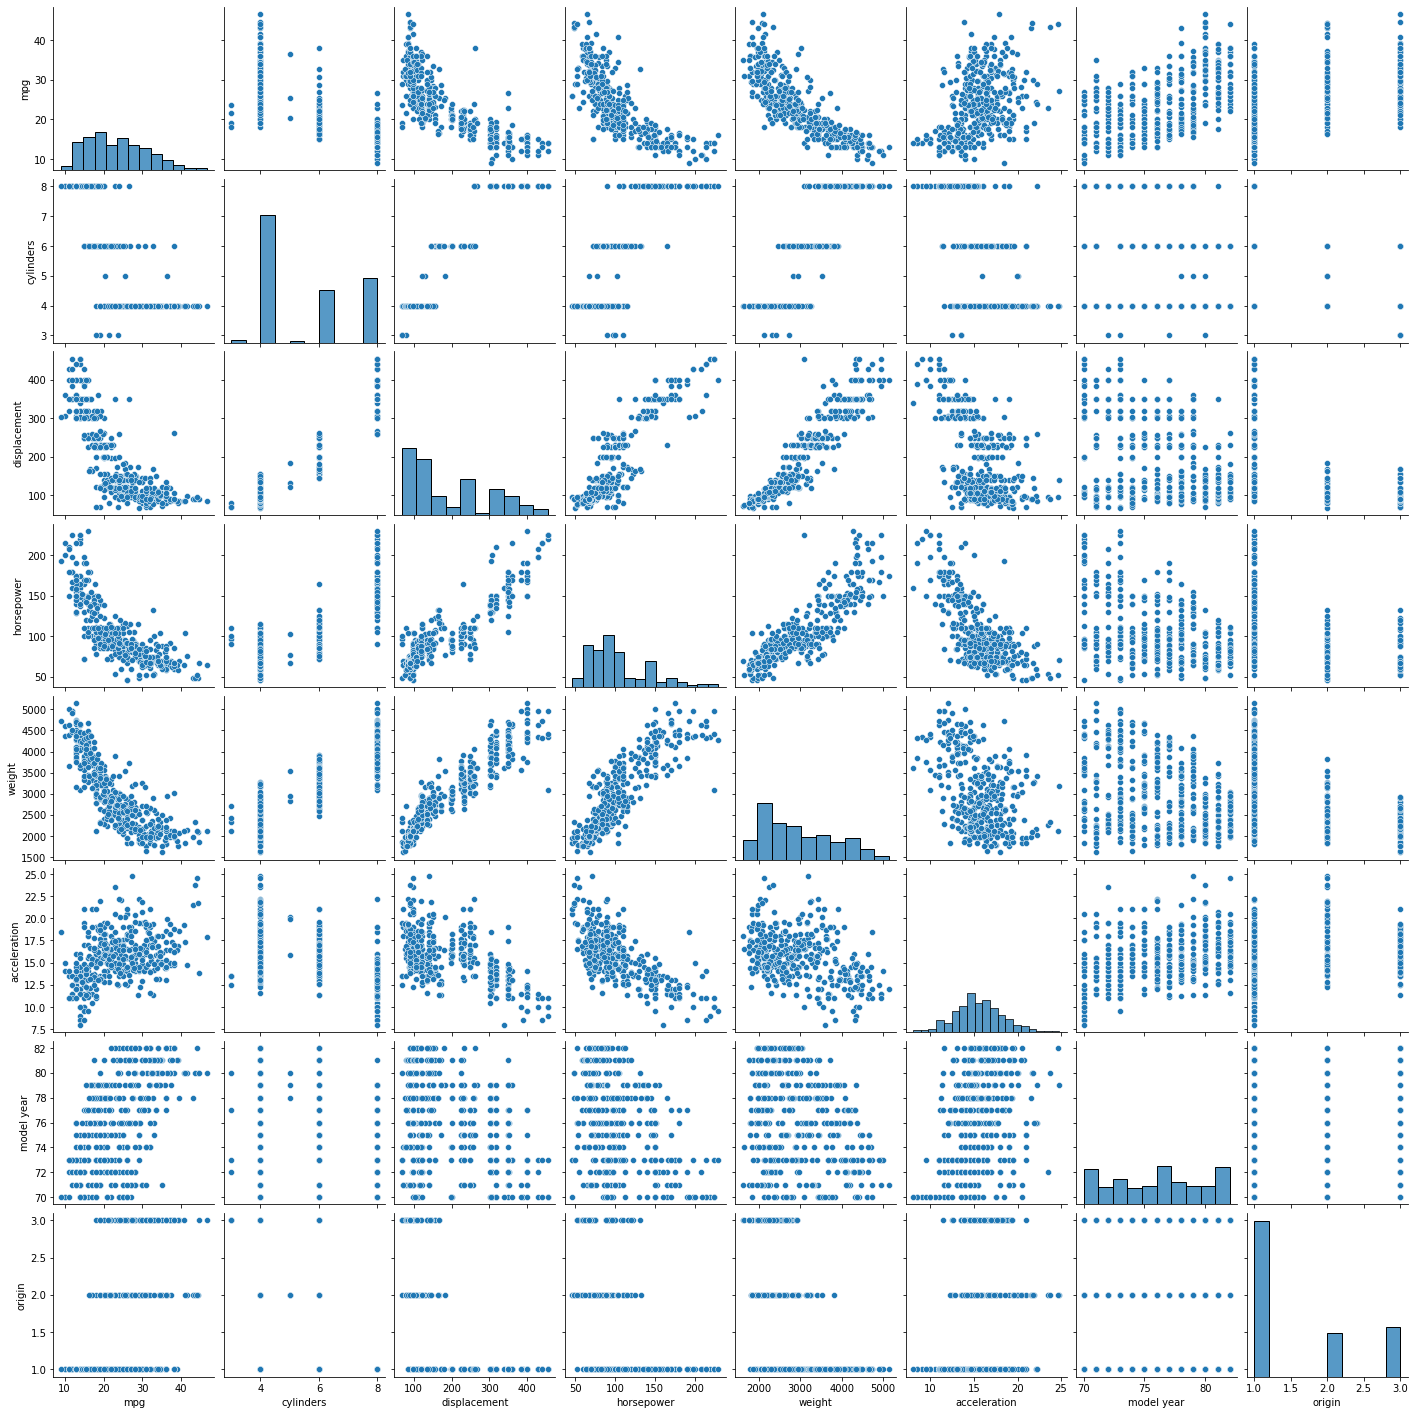

In [15]:
sns.pairplot(mpg_df)

### Step 4. Check and handle the missing values, if any.

In [16]:
mpg_df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [17]:
mpg_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    int64  
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(5), object(1)
memory usage: 28.1+ KB


### Step 5. Create a plot to check the relationship between horsepower and acceleration. Note down your insight for the same. Beautify the graph using various customizations.

Text(0, 0.5, 'Acceleration')

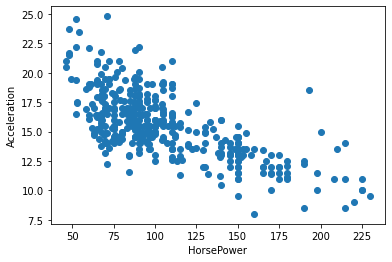

In [18]:
plt.scatter(x = mpg_df.horsepower, y = mpg_df.acceleration)
plt.xlabel("HorsePower")
plt.ylabel("Acceleration")

<AxesSubplot:xlabel='horsepower', ylabel='acceleration'>

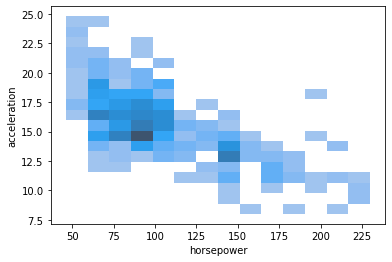

In [19]:
sns.histplot(data=mpg_df,x='horsepower',y='acceleration')

### Step 6. Generate subplots to display the histograms for acceleration, displacement and weight and kilometer_per_litre. Note down your insight for the same

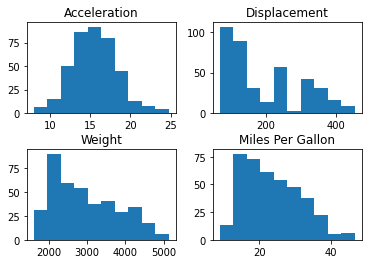

In [20]:
fig, ax = plt.subplots(2,2)

ax[0,0].hist(mpg_df.acceleration)
ax[0,0].set_title('Acceleration')

ax[0,1].hist(mpg_df.displacement)
ax[0,1].set_title('Displacement')

ax[1,0].hist(mpg_df.weight)
ax[1,0].set_title('Weight')

ax[1,1].hist(mpg_df.mpg)
ax[1,1].set_title('Miles Per Gallon')

plt.subplots_adjust(wspace=0.25, hspace=0.40)

### Step 7. Create a plot to check the relationship between displacement and weight for origin 2, color the datapoints based on no of cylinders. Note down your insight for the same and save the plot as an image file. 

<AxesSubplot:xlabel='displacement', ylabel='weight'>

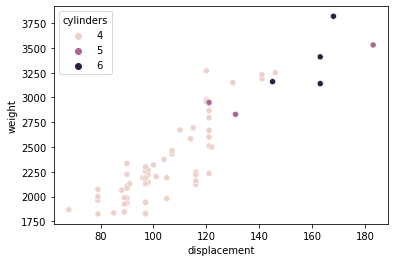

In [21]:
sns.scatterplot(data = mpg_df[mpg_df.origin == 2], x = 'displacement', y = 'weight',hue = 'cylinders')

**Observation :** For origin = 2, majority of entries are with cylinder = 4 and displacement and weight is almost linearly related

### Step 8. Display the frequency distribution of the Origin variable. Note down your insight for the same

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='origin', ylabel='count'>

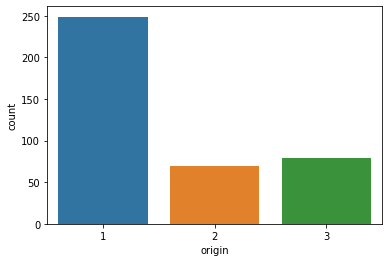

In [22]:
sns.countplot(mpg_df.origin)

**Observation :** Most of the vehicles are from origin 1 and almost same number of vehicles are from origin 2 and 3

### Step 9. Check the relationship of multiple variables wrt kilometer_per_litre. Note down your insight for the same

In [23]:
corr = mpg_df.corr()['mpg']
corr

mpg             1.000000
cylinders      -0.775396
displacement   -0.804203
horsepower     -0.771543
weight         -0.831741
acceleration    0.420289
model year      0.579267
origin          0.563450
Name: mpg, dtype: float64

In [24]:
for i in corr.index:
    print("Correlation of Miles per gallon with {} is : {}".format(i,corr[i]))

Correlation of Miles per gallon with mpg is : 1.0
Correlation of Miles per gallon with cylinders is : -0.7753962854205539
Correlation of Miles per gallon with displacement is : -0.8042028248058979
Correlation of Miles per gallon with horsepower is : -0.7715428437190017
Correlation of Miles per gallon with weight is : -0.8317409332443344
Correlation of Miles per gallon with acceleration is : 0.42028891210165054
Correlation of Miles per gallon with model year is : 0.5792671330833092
Correlation of Miles per gallon with origin is : 0.5634503597738431


### Step 10. Display the average weight based on no of cylinders present. Note down the insight for the same

<BarContainer object of 5 artists>

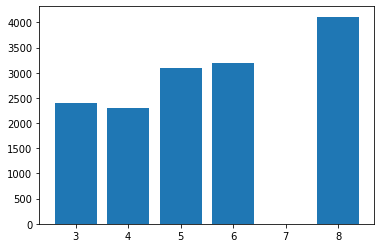

In [25]:
data = mpg_df.groupby('cylinders')['weight'].mean()
plt.bar(x = data.index, height = data)

### Step 11. Check for the outliers in the dataset. Note down the insight for the same.

In [26]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_range=Q1-(1.5*IQR)
    upper_range=Q3+(1.5*IQR)
    return lower_range,upper_range

In [27]:
def normalizer(col):
    max_val = max(col)
    min_val = min(col)
    mean = col.mean()
    col = col.apply(lambda x: (x-mean)/(max_val - min_val))
    return col

In [28]:
#normalizing the data
temp_data = mpg_df.drop('car name',axis = 1)
for col in temp_data:
    temp_data[col] = normalizer(temp_data[col])
temp_data

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,-0.146664,0.509045,0.293473,0.138792,0.151283,-0.212386,-0.500838,-0.286432
1,-0.226451,0.509045,0.404584,0.329009,0.204870,-0.242148,-0.500838,-0.286432
2,-0.146664,0.509045,0.321897,0.247487,0.132003,-0.271910,-0.500838,-0.286432
3,-0.199856,0.509045,0.285721,0.247487,0.131153,-0.212386,-0.500838,-0.286432
4,-0.173260,0.509045,0.280553,0.193140,0.135689,-0.301672,-0.500838,-0.286432
...,...,...,...,...,...,...,...,...
393,0.092698,-0.290955,-0.138051,-0.100339,-0.051155,0.001899,0.499162,-0.286432
394,0.544825,-0.290955,-0.249162,-0.285121,-0.238283,0.537614,0.499162,0.213568
395,0.225676,-0.290955,-0.150971,-0.111208,-0.191501,-0.236196,0.499162,-0.286432
396,0.119293,-0.290955,-0.189731,-0.138382,-0.097937,0.180471,0.499162,-0.286432


<AxesSubplot:>

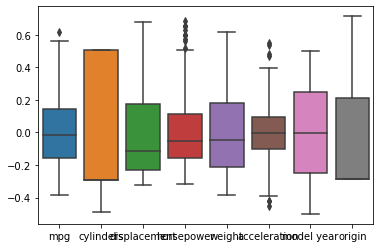

In [29]:
sns.boxplot(data = temp_data)

In [30]:
# Removing all the outliers
for col in temp_data:
    low_lead_time,up_lead_time = remove_outlier(temp_data[col])
    temp_data[col] = np.where(temp_data[col]>up_lead_time,up_lead_time,temp_data[col])
    temp_data[col] = np.where(temp_data[col]<low_lead_time,low_lead_time,temp_data[col])

<AxesSubplot:>

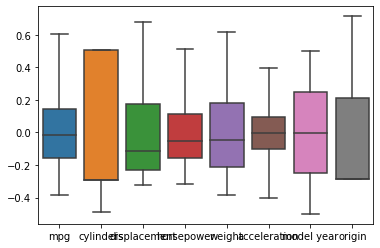

In [31]:
sns.boxplot(data = temp_data)

### Step 12. Plot the correlations for variables.

<AxesSubplot:>

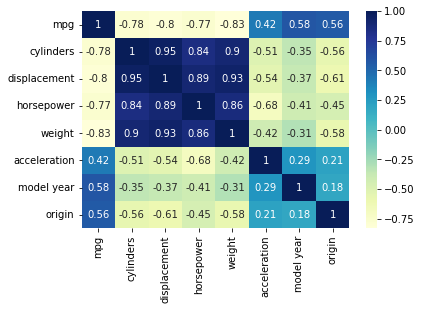

In [32]:
corr = mpg_df.corr()
sns.heatmap(corr,annot=True,cmap="YlGnBu")